# classification of reviews

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importing required libraries :
import pandas as pd
import numpy as np

# for removing accented and special chracters
import unicodedata

# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# for calculating Polarity and Subjectivity
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
# function for making ngrams
from nltk.util import ngrams

# load in all the modules we're going to need #NLTK libraries
import nltk
import collections

# for Wordscloud
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#download vader from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## for resampling
from sklearn.utils import resample

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import set_config
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

## Importing required libraries :
import pandas as pd
import numpy as np

# for removing accented and special chracters
import unicodedata

# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# for calculating Polarity and Subjectivity
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
# function for making ngrams
from nltk.util import ngrams

# load in all the modules we're going to need #NLTK libraries
import nltk
import collections

# for Wordscloud
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

#download vader from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## for resampling
from sklearn.utils import resample

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import set_config
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/df_processed_new.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,reviewerID,asin,reviewerName,reviewText,overall,summary,price,brand,...,sentiment1,helpful_rate,polarity,review_len,word_count,polarity_vader,compound,pos,neg,type
0,0,0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...",anthemic title track begins quotthe memory tre...,5.0,Enya Experiments And Succeeds,9.49,NaN,...,Positive,0.8,0.137327,1806,256,"{'neg': 0.079, 'neu': 0.621, 'pos': 0.301, 'co...",0.9980,0.301,0.079,POS
1,1,1,A1WR23ER5HMAA9,5555991584,AKB,thought enya couldnt possibly get better found...,5.0,How to improve upon perfection.,9.49,NaN,...,Positive,1.0,0.560000,306,42,"{'neg': 0.104, 'neu': 0.472, 'pos': 0.425, 'co...",0.9722,0.425,0.104,POS
2,2,2,A2IR4Q0GPAFJKW,5555991584,Alexander,nice cd easy listening husband like quite bit ...,4.0,Good listening.,9.49,NaN,...,Positive,0.0,0.577778,73,12,"{'neg': 0.0, 'neu': 0.413, 'pos': 0.587, 'comp...",0.8850,0.587,0.000,POS
3,3,3,A2V0KUVAB9HSYO,5555991584,Alison Hight,really liked cd especially different languages...,4.0,Loved It,9.49,NaN,...,Positive,0.0,0.378571,169,25,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.7501,0.218,0.000,POS
4,4,4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""",enyas richly chorded style smitten little bit ...,5.0,Another Hauntingly Beautiful Collection of Songs,9.49,NaN,...,Positive,1.0,0.322348,460,67,"{'neg': 0.027, 'neu': 0.683, 'pos': 0.29, 'com...",0.9693,0.290,0.027,POS


In [ ]:
df.dropna(subset = ['reviewText'],inplace=True)

In [ ]:
df["reviewText"].isnull().sum()

0

In [ ]:
## here also i should write a code for resampling as there is a high class imbalance in the dataset.

In [ ]:
music_pos = df[df['type']=='POS']
music_neu = df[df['type']=='NEUTRAL']
music_neg = df[df['type']=='NEG']
 
df_music_pos = resample(music_pos, replace=False, n_samples=70000)

df_music_neu = resample(music_neu, replace=True,n_samples=70000)

df_music_neg = resample(music_neg,replace=True, n_samples=70000)

# Combine minority class with downsampled majority class
music_df = pd.concat([df_music_pos, df_music_neu,df_music_neg])

In [ ]:
v = TfidfVectorizer(max_features=2500,decode_error='replace', encoding='utf-8')      #max_features=2500,
X = v.fit_transform(music_df['reviewText'].apply(lambda x: np.str_(x))) #x = v.fit_transform(df['Review'].values.astype('U'))

In [ ]:
#X = cv.fit_transform(df['reviewText'].head(300000)).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, music_df['type'],
                                                    test_size=0.3,
                                                    stratify=music_df['type'],
                                                    random_state = 42)

In [ ]:
X_train.shape[0]

147000

In [ ]:
X_test.shape[0]

63000

In [ ]:
## 1).classification model : -

In [ ]:
#a).logistic regression

In [ ]:
## LIBRARY AND MODEL DATA FITTING AND IMPORTING (2 LINES FOR IT)
from sklearn.tree import DecisionTreeClassifier 
model = LogisticRegression().fit(X_train,y_train)

In [ ]:
pred = model.predict(X_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
print('Precision Score : ' + str(precision_score(y_test,pred,average="weighted")))
print('Recall Score : ' + str(recall_score(y_test,pred,average="weighted")))
print('F1 Score : ' + str(f1_score(y_test,pred,average="weighted")))

Accuracy Score : 0.8565555555555555
Precision Score : 0.8550871381587573
Recall Score : 0.8565555555555555
F1 Score : 0.8551007598376741


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         NEG       0.82      0.78      0.80     21000
     NEUTRAL       0.89      0.96      0.92     21000
         POS       0.86      0.83      0.84     21000

    accuracy                           0.86     63000
   macro avg       0.86      0.86      0.86     63000
weighted avg       0.86      0.86      0.86     63000



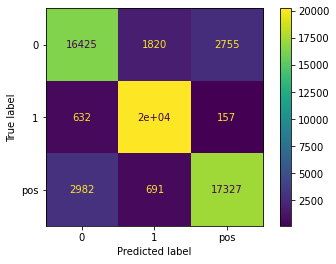

In [ ]:
cm = confusion_matrix(y_test,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1, "pos"])
cm_display.plot()
plt.show()

In [ ]:
###########################################################################################################################################################

In [ ]:
#########################################################################################################################################################

In [ ]:
music_df.type.value_counts()         ## this is based on vader polarity

POS        70000
NEUTRAL    70000
NEG        70000
Name: type, dtype: int64

## pipeline

In [ ]:
df.dropna(subset = ['reviewText'],inplace=True)

In [ ]:
## here i shopuld wrute a code for resampling
from sklearn.utils import resample

In [ ]:
music_pos = df[df['type']=='POS']
music_neu = df[df['type']=='NEUTRAL']
music_neg = df[df['type']=='NEG']
 
df_music_pos = resample(music_pos, replace=False,n_samples=70000)

df_music_neu = resample(music_neu,  replace=True,n_samples=70000)

df_music_neg = resample(music_neg, replace=True, n_samples=70000)

# Combine minority class with downsampled majority class
music_df = pd.concat([df_music_pos, df_music_neu,df_music_neg])

In [ ]:
music_df.head(3)

,Unnamed: 0,Unnamed: 0.1,reviewerID,asin,reviewerName,reviewText,overall,summary,price,brand,...,sentiment1,helpful_rate,polarity,review_len,word_count,polarity_vader,compound,pos,neg,type
152423,152423,152423,A2LFLKFE3B0PSA,B000066C1W,"jono ""jono""",another great rocafella records album best son...,4.0,A GOOD ALBUM,8.39,Virgin Emi Records,...,Positive,1.0,0.387576,321,57,"{'neg': 0.125, 'neu': 0.671, 'pos': 0.204, 'co...",0.8554,0.204,0.125,POS
74086,74086,74086,A3UGD3PSYW2V6Y,B000002W93,MATT,one favorite bands actually say artists talent...,5.0,one of the greatest 80's bands ever !!!!!,6.59,NaN,...,Positive,1.0,0.245833,284,41,"{'neg': 0.056, 'neu': 0.674, 'pos': 0.27, 'com...",0.8772,0.270,0.056,POS
417315,417315,417315,AGZ9AO1X0BSHY,B001NZP4R0,Tammie Arias,one alltime favorite songs anyone loves bryan ...,5.0,Classic Bryan Adams! Awesome song!,1.29,NaN,...,Positive,0.0,0.366667,103,17,"{'neg': 0.135, 'neu': 0.532, 'pos': 0.333, 'co...",0.5927,0.333,0.135,POS


In [ ]:
len(music_df)

210000

In [ ]:
music_df.type.value_counts()    ## now class imbalance is not present here in this dataset.

POS        70000
NEUTRAL    70000
NEG        70000
Name: type, dtype: int64

In [ ]:
X = music_df["reviewText"]
y = music_df["type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
f1_list = []
recall_list = []
precision_list = []
train_accuracy_list = []
test_accuracy_list = []

def f1_score1(precision,recall):
  f1 = 2*(precision * recall)/(precision + recall)
  return f1
     

In [ ]:
def evaluation(pipeline):
  pipeline = pipeline.fit(X_train, y_train)
  global accuracy_train, accuracy_test, precision1, recall1, f1_score, y_pred_test, y_pred_train
  
  y_pred_train = pipeline.predict(X_train)
  y_pred_test = pipeline.predict(X_test)

  accuracy_train=accuracy_score(y_train, y_pred_train)
  accuracy_test=accuracy_score(y_test, y_pred_test)
  precision1 = precision_score(y_test, y_pred_test,average="weighted")
  recall1 = recall_score(y_test, y_pred_test,average="weighted")
  f1_score2 = f1_score1(precision1, recall1)

  print('Accuracy on train %f' %accuracy_train)
  print('Accuracy on test %f' %accuracy_test)
  print("F1 Score", f1_score2)
  print("Precision Score", precision1)
  print("Recall Score", recall1)

  f1_list.append(f1_score2)
  precision_list.append(precision1)
  recall_list.append(recall1)
  train_accuracy_list.append(accuracy_train)
  test_accuracy_list.append(accuracy_test)

In [ ]:
## 1).Check performance using logistic regression model :

In [ ]:
def preprocess_text(text):                                  ### how to use it correctly check it once 
    
    text = re.sub("n\'t", " not", text)
    text = re.sub("\'re", " are", text)
    text = re.sub("\'s", " is", text)
    text = re.sub("\'d", " would", text)
    text = re.sub("\'ll", " will", text)
    text = re.sub("\'ve", " have", text)
    text = re.sub("\'m", " am", text)
    text = re.sub(r"\b[a-zA-Z]\b", '', text) # remove single characters
    text = re.sub(r'\w*\d\w*', '', text) # remove words with numbers
    text = re.sub(r'\s+', ' ', text) # remove extra spaces
    text = re.sub(r'^\s+|\s+?$', '', text) # strip spaces
    text = re.sub("-(?!\w)","",text) #remove hyphen except for words which need it eg-Co-operate
    text = re.sub("(http[s]?\://\S+)|([\[\(].*[\)\]])|([#@]\S+)|\n", "",text) #Removing text in brackets
    
    # remove special characters and HTML
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove special characters, HTML tags, and punctuation marks
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text, re.I|re.A)
    
    # Convert text to lowercase
    cleaned_text = cleaned_text.lower()
    # Remove numbers
    cleaned_text = re.sub(r'\d+', '', cleaned_text)
    
    # remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [i for i in cleaned_text if i not in stop_words]
    
    
    # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    cleaned_text = " ".join([lemmatizer.lemmatize(word) for word in cleaned_text.split()])
    
    return cleaned_text

In [ ]:
pipeline_lr_tfidf = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_lr_tfidf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr")),])


evaluation(pipeline_lr_tfidf)

Accuracy on train 0.934077
Accuracy on test 0.891452
F1 Score 0.8910613660946335
Precision Score 0.8906706941056448
Recall Score 0.891452380952381


In [ ]:
### Validaation of model 

In [ ]:
x=preprocess_text("it's a common thing to do a good practice in the society but i did not like this product very much due to its design,apprearnce is good but not of that high quality ")
prediction = pipeline_lr_tfidf.predict([x])
print(prediction)

['NEG']


In [ ]:
x=preprocess_text("it's a really good product ")
prediction = pipeline_lr_tfidf.predict([x])
print(prediction)

['POS']


In [ ]:
x=preprocess_text("its not good product  ")
prediction = pipeline_lr_tfidf.predict([x])
print(prediction)

['NEG']


In [ ]:
x=preprocess_text("poularly good778 product and still reviews are not as per required  ")
prediction = pipeline_lr_tfidf.predict([x])
print(prediction)

['NEUTRAL']


In [ ]:
#########################################################################

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/df_processed_new.csv")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,reviewerID,asin,reviewerName,reviewText,overall,summary,price,brand,...,sentiment1,helpful_rate,polarity,review_len,word_count,polarity_vader,compound,pos,neg,type
0,0,0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...",anthemic title track begins quotthe memory tre...,5.0,Enya Experiments And Succeeds,9.49,NaN,...,Positive,0.8,0.137327,1806,256,"{'neg': 0.079, 'neu': 0.621, 'pos': 0.301, 'co...",0.9980,0.301,0.079,POS
1,1,1,A1WR23ER5HMAA9,5555991584,AKB,thought enya couldnt possibly get better found...,5.0,How to improve upon perfection.,9.49,NaN,...,Positive,1.0,0.560000,306,42,"{'neg': 0.104, 'neu': 0.472, 'pos': 0.425, 'co...",0.9722,0.425,0.104,POS
2,2,2,A2IR4Q0GPAFJKW,5555991584,Alexander,nice cd easy listening husband like quite bit ...,4.0,Good listening.,9.49,NaN,...,Positive,0.0,0.577778,73,12,"{'neg': 0.0, 'neu': 0.413, 'pos': 0.587, 'comp...",0.8850,0.587,0.000,POS
3,3,3,A2V0KUVAB9HSYO,5555991584,Alison Hight,really liked cd especially different languages...,4.0,Loved It,9.49,NaN,...,Positive,0.0,0.378571,169,25,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.7501,0.218,0.000,POS
4,4,4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""",enyas richly chorded style smitten little bit ...,5.0,Another Hauntingly Beautiful Collection of Songs,9.49,NaN,...,Positive,1.0,0.322348,460,67,"{'neg': 0.027, 'neu': 0.683, 'pos': 0.29, 'com...",0.9693,0.290,0.027,POS


In [ ]:
## Reccomendation system :

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the data and create a pivot table
new_df1 = df.head(50000)

# Group data by date
new_df1 = new_df1.groupby(['reviewerID', 'date']).agg({'asin': 'first', 'overall': 'mean'})

# Create a pivot table
ratings_matrix = new_df1.pivot_table(values='overall', index='reviewerID', columns='asin', fill_value=0)

# Perform SVD on the pivot table
X = ratings_matrix.T
svd = TruncatedSVD(n_components=10)
decomposed_matrix = svd.fit_transform(X)

# Calculate cosine similarity
cosine_sim = cosine_similarity(decomposed_matrix)

# Get the product ID of the item
product_names = list(X.index)
product_id = product_names.index("B0000004UU")

# Get the products with a cosine similarity greater than a threshold
threshold = 0.95
recommend = list(X.index[cosine_sim[product_id] > threshold])

# Remove the item already bought by the customer 
recommend.remove("B0000004UU")

# Print the recommended items
print(recommend)


['B00000050N', 'B00000051K', 'B00000052I', 'B00000053G', 'B000000W2Z', 'B000000W7W', 'B000001G0E', 'B0000024I7', 'B0000024JL', 'B0000024L0', 'B000002H84']
